In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/hack_illinois.csv')

In [72]:
df.head()

,AssetID,Date,Asset type,Total Hours,Total Fuel (Liters),Fuel Level (%),GPS Lattitude,GPS Longitude
0,1022011,2018-04-06,Motor Grader,4.03,333.13,97.79,37.501627,-79.868284
1,1022011,2018-04-07,Motor Grader,7.34,780.29,3.80,37.502335,-79.867422
2,1022011,2018-04-08,Motor Grader,7.27,944.96,28.64,37.502308,-79.867891
3,1022011,2018-04-09,Motor Grader,7.35,872.81,83.86,37.500230,-79.869236
4,1022011,2018-04-10,Motor Grader,13.39,856.22,40.68,37.500349,-79.869155


In [114]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [115]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Week'] = pd.DatetimeIndex(df['Date']).week
df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek

/Users/eyasuwoldu/opt/anaconda3/envs/hackthis2021/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [116]:
df.head()

,AssetID,Date,Asset type,Total Hours,Total Fuel (Liters),Fuel Level (%),GPS Lattitude,GPS Longitude,Year,Month,Week,DayOfWeek
0,1022011,2018-04-06,Motor Grader,4.03,333.13,97.79,37.501627,-79.868284,2018,4,14,4
1,1022011,2018-04-07,Motor Grader,7.34,780.29,3.80,37.502335,-79.867422,2018,4,14,5
2,1022011,2018-04-08,Motor Grader,7.27,944.96,28.64,37.502308,-79.867891,2018,4,14,6
3,1022011,2018-04-09,Motor Grader,7.35,872.81,83.86,37.500230,-79.869236,2018,4,15,0
4,1022011,2018-04-10,Motor Grader,13.39,856.22,40.68,37.500349,-79.869155,2018,4,15,1


In [75]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

In [76]:
# (ggplot(df_lo, aes('Total Hours', 'Total Fuel (Liters)'))
#  + geom_point()
# #  + stat_smooth(method='lm')
# #  + facet_wrap('~Asset type')
# )

In [77]:
df['Asset type'].unique()

array(['Motor Grader', 'Excavator', 'Wheel Loader', 'Off Highway Truck',
       'Backhoe', 'Track Type Tractor'], dtype=object)

In [119]:
df_lo = df[(df["GPS Longitude"] >= -124.80) & (df["GPS Longitude"] <= -66.45)\
& (df["GPS Lattitude"] >= 25.05) & (df["GPS Lattitude"] <= 49.72)]

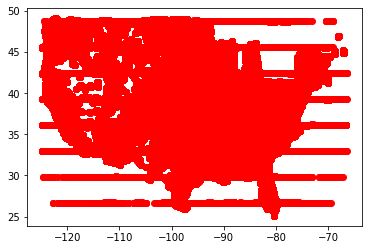

In [57]:
plt.plot(df_lo['GPS Longitude'], df_lo['GPS Lattitude'], 'ro')

In [135]:
df[(df['GPS Longitude'] <= -110) & (df['GPS Lattitude'] <= 30)]

,AssetID,Date,Asset type,Total Hours,Total Fuel (Liters),Fuel Level (%),GPS Lattitude,GPS Longitude,Year,Month,Week,DayOfWeek
220215,1022614,2018-08-04,Excavator,1.08,1061.38,69.25,29.849343,-120.894918,2018,8,31,5
220216,1022614,2018-08-05,Excavator,0.92,1151.31,94.90,29.846669,-120.863398,2018,8,31,6
220217,1022614,2018-08-06,Excavator,15.56,417.06,19.87,29.848270,-119.871775,2018,8,32,0
220218,1022614,2018-08-07,Excavator,12.22,1034.70,40.24,29.849626,-120.757042,2018,8,32,1
220219,1022614,2018-08-08,Excavator,6.23,171.99,76.60,29.851789,-120.356811,2018,8,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13299500,1038447,2019-04-01,Motor Grader,9.47,172.27,61.86,29.842464,-450.231015,2019,4,14,0
13299501,1038447,2019-04-02,Motor Grader,23.27,364.33,2.96,29.841569,-449.874597,2019,4,14,1
13299502,1038447,2019-04-03,Motor Grader,5.41,966.12,34.61,29.839763,-450.054842,2019,4,14,2
13299503,1038447,2019-04-04,Motor Grader,16.18,282.85,16.33,29.840435,-450.291441,2019,4,14,3


In [30]:
print(df['GPS Lattitude'].min())
print(df['GPS Lattitude'].max())
print(df['GPS Longitude'].min())
print(df['GPS Longitude'].max())

17.890088
70.65368
-5326.109368
3721.096871


In [128]:
df_agg = df_lo.groupby(['AssetID','DayOfWeek']).agg({'Total Hours': 'mean',
                                                    'Fuel Level (%)': 'mean'}).reset_index()

In [129]:
df_agg.head()

,AssetID,DayOfWeek,Total Hours,Fuel Level (%)
0,1022011,0,11.376731,57.004231
1,1022011,1,13.579231,52.290962
2,1022011,2,11.616731,43.310769
3,1022011,3,12.020577,50.212885
4,1022011,4,10.902453,48.971509


In [133]:
df.corr()['Fuel Level (%)']

AssetID                1.455915e-04
Total Hours            4.106372e-07
Total Fuel (Liters)    2.731304e-04
Fuel Level (%)         1.000000e+00
GPS Lattitude         -5.776888e-04
GPS Longitude         -1.362534e-04
Year                   4.319968e-04
Month                 -7.821377e-04
Week                  -8.072825e-04
DayOfWeek             -4.616615e-04
Name: Fuel Level (%), dtype: float64

<AxesSubplot:>

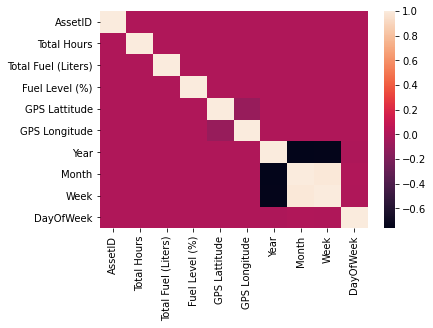

In [131]:
sns.heatmap(df.corr())

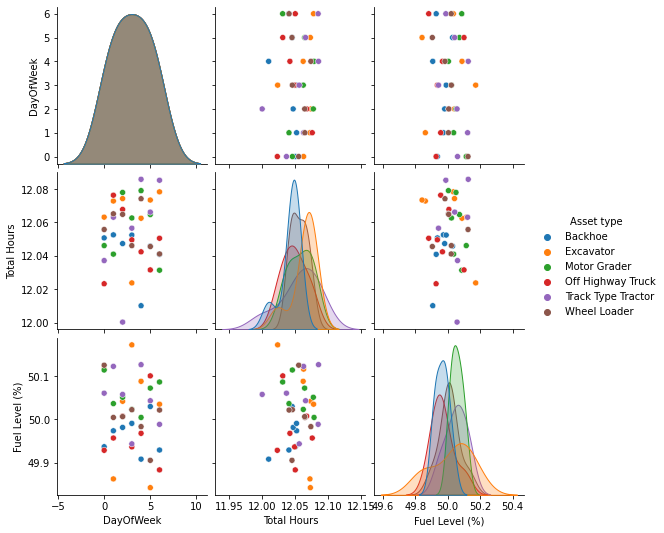

In [122]:
sns.pairplot(df_agg, hue="Asset type")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Total Hours'>

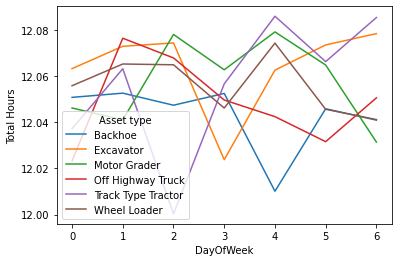

In [125]:
sns.lineplot(x="DayOfWeek", y="Total Hours",
             hue="Asset type",
             data=df_agg)

In [81]:
car0 = df_lo.query("AssetID == 1022011")

In [82]:
car0.head()

,AssetID,Date,Asset type,Total Hours,Total Fuel (Liters),Fuel Level (%),GPS Lattitude,GPS Longitude,Year,Month,Week
0,1022011,2018-04-06,Motor Grader,4.03,333.13,97.79,37.501627,-79.868284,2018,4,14
1,1022011,2018-04-07,Motor Grader,7.34,780.29,3.80,37.502335,-79.867422,2018,4,14
2,1022011,2018-04-08,Motor Grader,7.27,944.96,28.64,37.502308,-79.867891,2018,4,14
3,1022011,2018-04-09,Motor Grader,7.35,872.81,83.86,37.500230,-79.869236,2018,4,15
4,1022011,2018-04-10,Motor Grader,13.39,856.22,40.68,37.500349,-79.869155,2018,4,15


In [69]:
car0_agg = car0.groupby(['Week']).agg({'Total Hours': 'mean',
                                                'Fuel Level (%)': 'mean'})

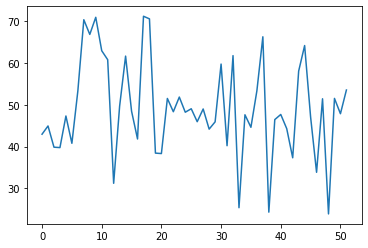

In [70]:
plt.plot([t for t in range(car0_agg.shape[0])], car0_agg['Fuel Level (%)']);

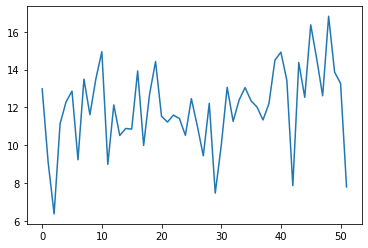

In [71]:
plt.plot([t for t in range(car0_agg.shape[0])], car0_agg['Total Hours']);